<a href="https://colab.research.google.com/github/riddhigarg2605/Chargebee/blob/main/covid19_vaccine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset information**

1) Date: considered Numeric

2) FIPS: Federal Information Processing Standard State Code (categorical) 

3) MMWR Week: categorical

4) Recip County: considered non discrete

5) Recip State: categorical

6) Series Complete Pop Pct: numeric

7) Series_Complete_12PlusPop_Pct: numeric

8) 18plus: numeric

9) 65plus: numeric

10) Completeness Pct: numeric

11) Administered_Dose1_Pop_Pct: numeric (state of residence)

12) 12plus

13) 18plus

14) 65plus

15) SVI: categorical

16) Series_Complete_Pop_Pct_SVI: num

17) 12plus

18) 18plus

19) 65plus

20) Metro status categorical

21) Series_Complete_Pop_Pct_UR_Equity num

22) 12plus

23) 18plus

24) 65plus

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
data = pd.read_csv('/content/drive/MyDrive/COVID-19_Vaccinations_in_the_United_States_County.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
data.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,10/09/2021,04025,40,Yavapai County,AZ,39.9,93695,93690.0,44.4,90975,46.0,47462,62.1,97.6,116143.0,49.4,116124.0,55.0,112729.0,57.0,57138.0,74.8,C,10.0,11.0,11.0,11.0,Metro,2.0,3.0,3.0,3.0
1,10/09/2021,21009,40,Barren County,KY,40.5,17899,17899.0,47.9,17034,50.3,5824,73.1,94.4,20240.0,45.7,20238.0,54.1,19157.0,56.6,6254.0,78.5,D,15.0,15.0,16.0,16.0,Non-metro,7.0,7.0,8.0,8.0
2,10/09/2021,21007,40,Ballard County,KY,32.5,2560,2560.0,37.3,2487,39.9,938,54.3,94.4,2867.0,36.3,2867.0,41.8,2771.0,44.4,989.0,57.3,B,6.0,6.0,6.0,7.0,Non-metro,6.0,6.0,6.0,7.0
3,10/09/2021,21091,40,Hancock County,KY,53.1,4635,4635.0,63.2,4365,66.5,1415,91.8,94.4,5170.0,59.3,5170.0,70.5,4839.0,73.8,1540.0,99.9,B,8.0,8.0,8.0,8.0,Metro,4.0,4.0,4.0,4.0
4,10/09/2021,46023,40,Charles Mix County,SD,42.3,3927,3926.0,53.4,3656,56.1,1250,72.4,84.8,4786.0,51.5,NaN,0.0,NaN,0.0,NaN,0.0,C,11.0,12.0,12.0,12.0,Non-metro,7.0,8.0,8.0,8.0


In [24]:
data.tail()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
987881,12/13/2020,37199,51,Yancey County,NC,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
987882,12/13/2020,51183,51,Sussex County,VA,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
987883,12/13/2020,5115,51,Pope County,AR,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
987884,12/13/2020,37005,51,Alleghany County,NC,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
987885,12/13/2020,5001,51,Arkansas County,AR,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN


In [25]:
data.describe()

,MMWR_week,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
count,987886.000000,987886.000000,9.878860e+05,9.743400e+05,974340.000000,9.878860e+05,987886.000000,9.878860e+05,987886.000000,987886.000000,9.564570e+05,987886.000000,9.193770e+05,974340.000000,9.327460e+05,987886.000000,9.327460e+05,987886.000000,769598.000000,757969.000000,769598.000000,769598.000000,768773.000000,757260.000000,768963.000000,768277.000000
mean,22.688029,20.268671,2.699178e+04,2.722113e+04,23.556656,2.594203e+04,25.137372,8.100795e+03,39.523809,71.231017,3.480526e+04,23.734552,3.533225e+04,26.687118,3.352521e+04,28.394438,1.028792e+04,43.870244,7.521010,7.822254,7.951289,8.437526,4.136417,4.422305,4.566332,5.056577
std,13.721695,18.500853,1.237251e+05,1.243838e+05,21.477379,1.175651e+05,22.508714,3.018484e+04,32.451032,38.397121,1.557777e+05,20.646208,1.582489e+05,24.099998,1.489981e+05,25.118906,3.793325e+04,35.007983,4.418697,4.457138,4.462396,4.508456,2.089933,2.190678,2.234566,2.253882
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,11.000000,0.800000,2.590000e+02,2.550000e+02,0.900000,2.580000e+02,1.100000,7.000000e+01,0.800000,51.200000,6.230000e+02,0.000000,5.620000e+02,0.000000,5.660000e+02,0.000000,2.230000e+02,0.000000,4.000000,4.000000,4.000000,4.000000,2.000000,3.000000,3.000000,3.000000
50%,22.000000,18.400000,3.135000e+03,3.152000e+03,21.300000,3.086000e+03,23.300000,1.331000e+03,45.500000,93.700000,4.599000e+03,22.900000,4.603000e+03,24.700000,4.483000e+03,27.100000,1.905000e+03,52.300000,8.000000,8.000000,8.000000,8.000000,5.000000,5.000000,5.000000,5.000000
75%,33.000000,34.700000,1.262300e+04,1.270600e+04,40.600000,1.231500e+04,43.500000,4.817000e+03,69.100000,97.300000,1.658900e+04,39.800000,1.664400e+04,46.000000,1.604300e+04,49.100000,6.087000e+03,75.800000,12.000000,12.000000,12.000000,12.000000,5.000000,6.000000,6.000000,7.000000
max,53.000000,99.900000,6.060267e+06,6.048632e+06,100.000000,5.601068e+06,100.000000,1.095652e+06,100.000000,100.000000,6.955162e+06,100.000000,6.936785e+06,100.000000,6.411383e+06,100.000000,1.264517e+06,100.000000,16.000000,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000


In [44]:
data['FIPS'].nunique()

2898

In [45]:
data['Date'].nunique()

283

In [46]:
data['Recip_County'].nunique()

1755

In [47]:
data['Recip_State'].nunique()

49

From the above observations, for the scope of this project, we can take recipient state as a categorical variable and recipient county, FIPS and Date as non discrete variables.

In [26]:
data.isnull().sum()

Date                                            0
FIPS                                            0
MMWR_week                                       0
Recip_County                                    0
Recip_State                                     0
Series_Complete_Pop_Pct                         0
Series_Complete_Yes                             0
Series_Complete_12Plus                      13546
Series_Complete_12PlusPop_Pct               13546
Series_Complete_18Plus                          0
Series_Complete_18PlusPop_Pct                   0
Series_Complete_65Plus                          0
Series_Complete_65PlusPop_Pct                   0
Completeness_pct                                0
Administered_Dose1_Recip                    31429
Administered_Dose1_Pop_Pct                      0
Administered_Dose1_Recip_12Plus             68509
Administered_Dose1_Recip_12PlusPop_Pct      13546
Administered_Dose1_Recip_18Plus             55140
Administered_Dose1_Recip_18PlusPop_Pct          0


Since our dataset is sufficiently large, we are working on the assumption that dropping the null values will not affect the trends.

In [27]:
data = data.dropna()

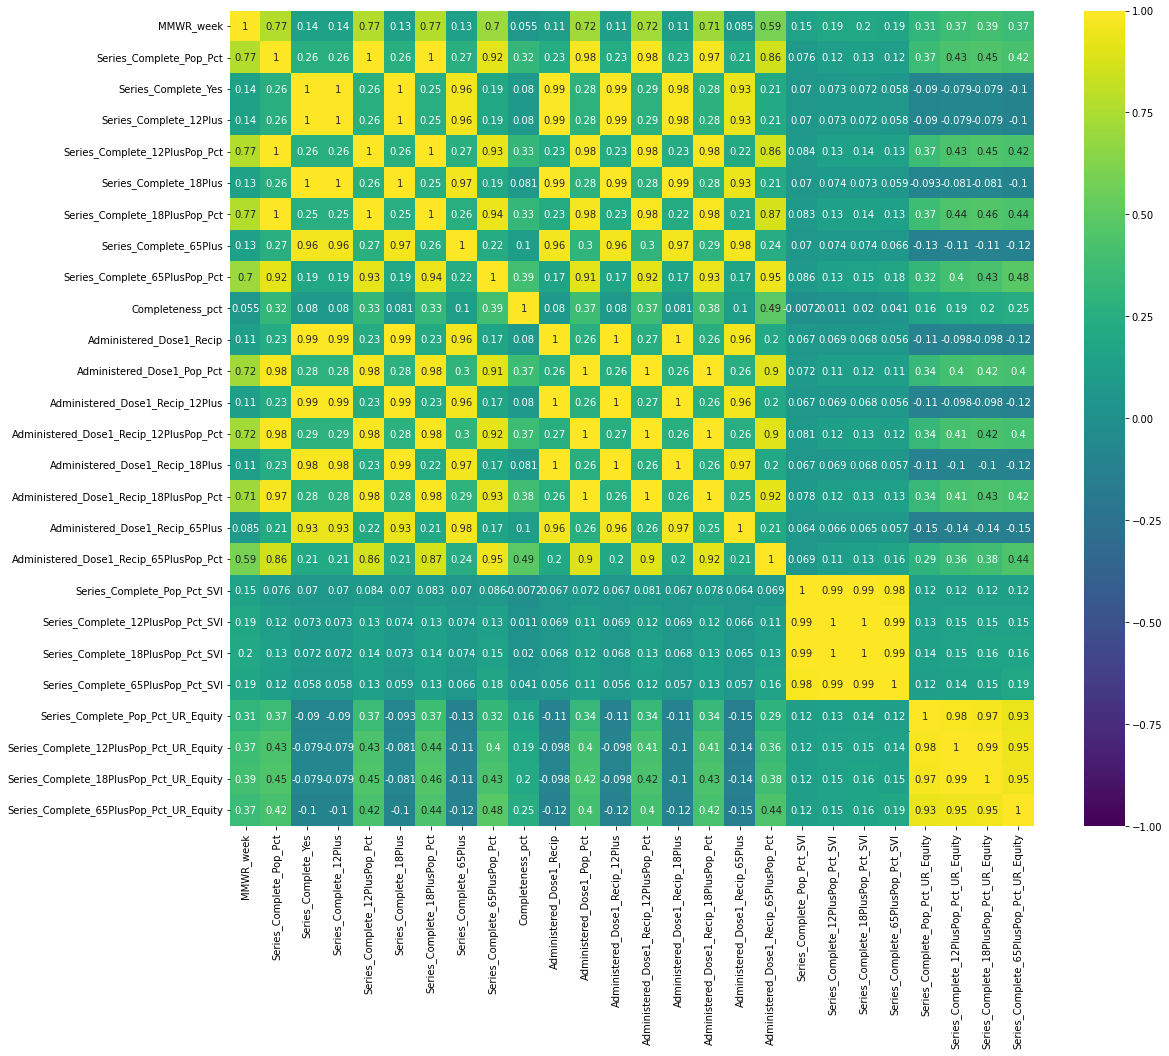

In [28]:
plt.rcParams['figure.figsize'] = (18, 15) #visualizing correlation between all the features
sns.heatmap(data.corr(),annot = True,  cmap = "viridis", vmin = -1, vmax = 1, center = 0)

From the correlation chart we can see that a few columns are highly correlated, hence dropping one of them will not effect the results. Since the columns 'Series_Complete_Pop_Pct' and 'Series_Complete_Yes' give similar information, we can choose to drop one of them. Same goes for 'Series_Complete_12Plus' and 'Series_Complete_12PlusPop_Pct' and so on.

In [29]:
data = data.drop(['Series_Complete_Yes','Series_Complete_12Plus','Series_Complete_18Plus','Series_Complete_65Plus','Administered_Dose1_Recip','Administered_Dose1_Recip_12Plus','Administered_Dose1_Recip_18Plus','Administered_Dose1_Recip_65Plus'], axis =1)

In [30]:
data.columns

Index(['Date', 'FIPS', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct',
       'Series_Complete_18PlusPop_Pct', 'Series_Complete_65PlusPop_Pct',
       'Completeness_pct', 'Administered_Dose1_Pop_Pct',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'SVI_CTGY',
       'Series_Complete_Pop_Pct_SVI', 'Series_Complete_12PlusPop_Pct_SVI',
       'Series_Complete_18PlusPop_Pct_SVI',
       'Series_Complete_65PlusPop_Pct_SVI', 'Metro_status',
       'Series_Complete_Pop_Pct_UR_Equity',
       'Series_Complete_12PlusPop_Pct_UR_Equity',
       'Series_Complete_18PlusPop_Pct_UR_Equity',
       'Series_Complete_65PlusPop_Pct_UR_Equity'],
      dtype='object')

# Visualizations

**Vaccination trends observed on the basis of time duration over the two years**

Text(0, 0.5, 'total vaccine percentage')

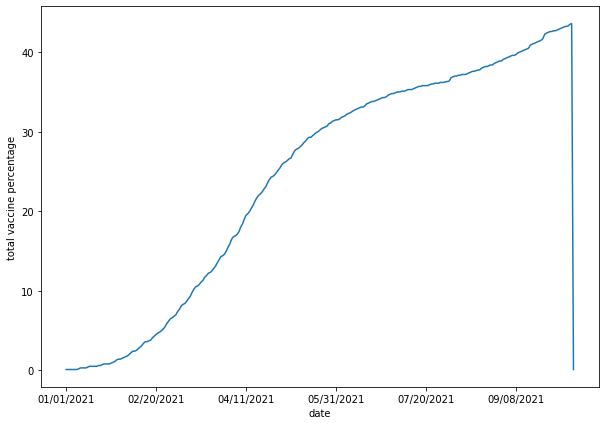

In [31]:
plt.rcParams['figure.figsize'] = (10, 7)
data.groupby('Date')['Series_Complete_Pop_Pct'].median().plot()
plt.xlabel('date')
plt.ylabel('total vaccine percentage')

We can observe that as the dates increase, the total percentage of vaccine by each jurisdiction also increases. It can also be seen that the highest percentage of fully administered vaccine is around 40%

Text(0, 0.5, 'Percentage of 1st dose wrt state')

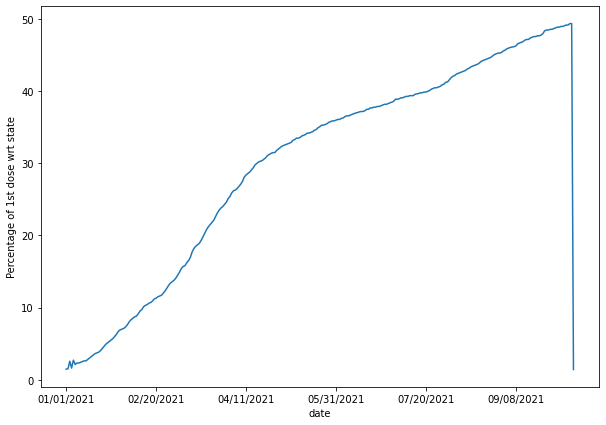

In [32]:
#plt.rcParams['figure.figsize'] = (8, 5)
data.groupby('Date')['Administered_Dose1_Pop_Pct'].median().plot()
plt.xlabel('date')
plt.ylabel('Percentage of 1st dose wrt state')

It can be observed that for all the states, percentage of people who have received at least one dose is higher by an average of 10% as compared to percentage of people who are fully vaccinated.

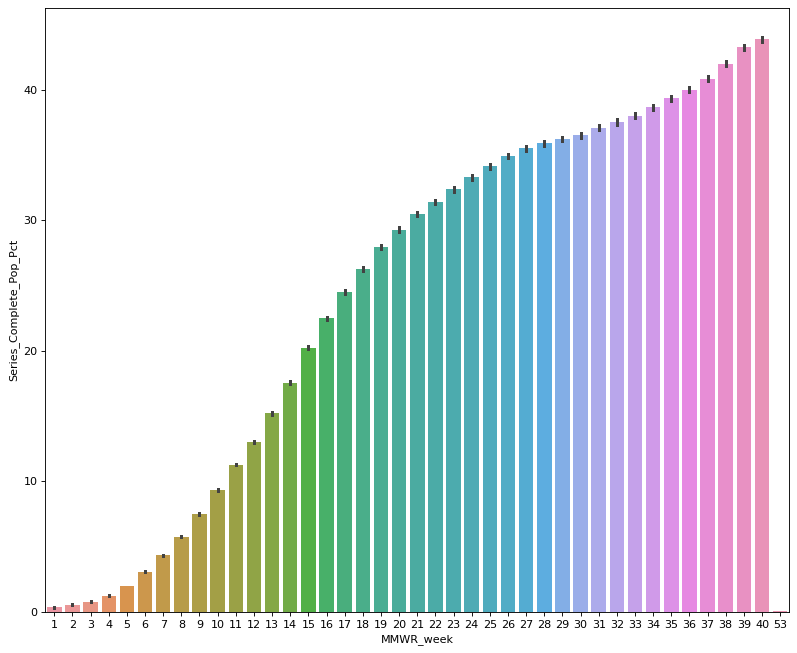

In [36]:
figure(figsize=(12, 10), dpi=80)
sns.barplot(x='MMWR_week', y='Series_Complete_Pop_Pct', data = data)

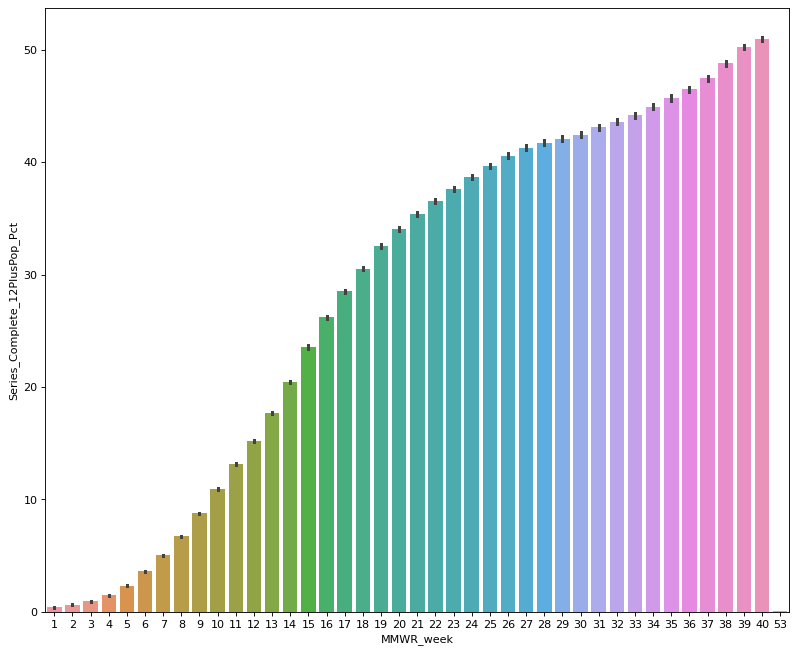

In [37]:
figure(figsize=(12, 10), dpi=80)
sns.barplot(x='MMWR_week', y='Series_Complete_12PlusPop_Pct', data = data)

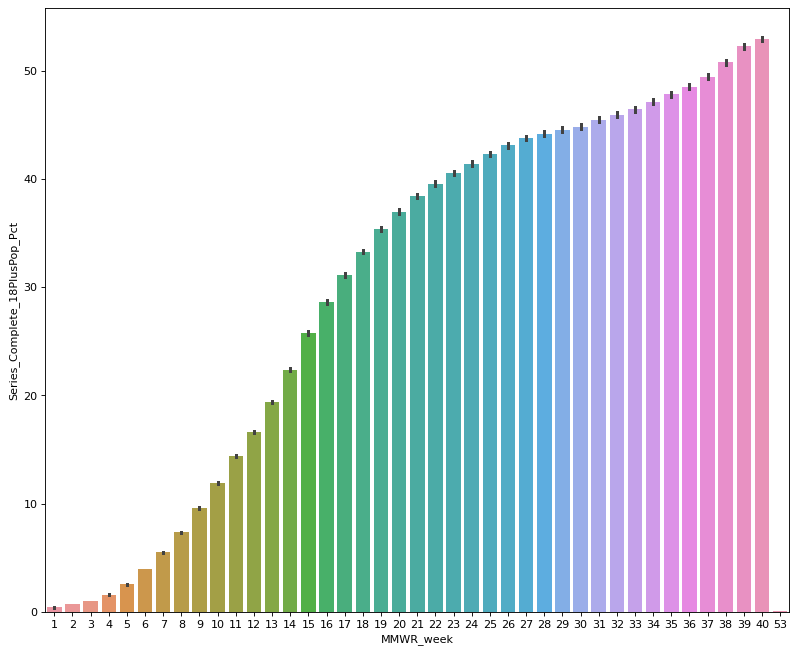

In [38]:
figure(figsize=(12, 10), dpi=80)
sns.barplot(x='MMWR_week', y='Series_Complete_18PlusPop_Pct', data = data)

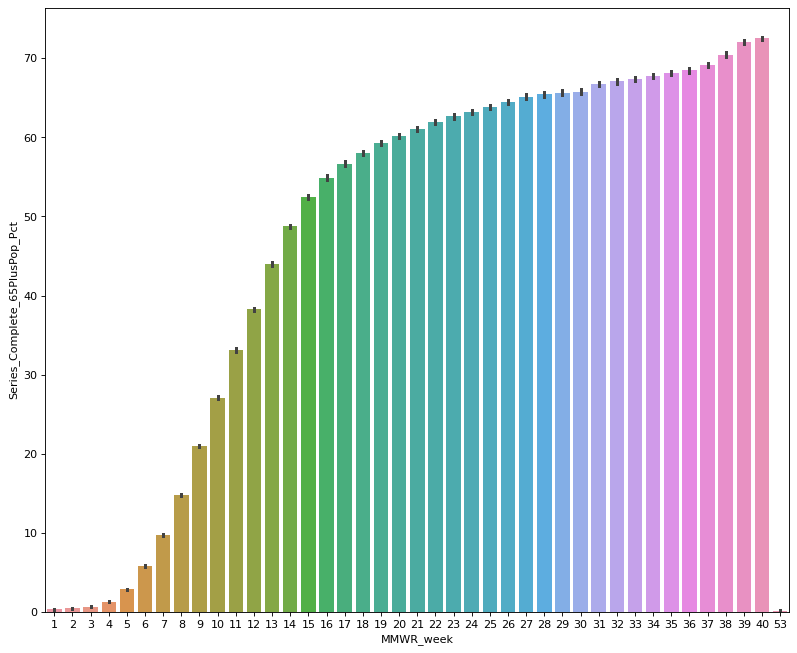

In [39]:
figure(figsize=(12, 10), dpi=80)
sns.barplot(x='MMWR_week', y='Series_Complete_65PlusPop_Pct', data = data)

MMWR(Morbidity and Mortality Weekly Report) week is a sequential measure used by CDC. From the above plots, we can see that as the date increased, more and more people were vaccinated (09/21 towards the head vs 12/20 at the tail). It can also be seen that the vaccines administered for people with ages 65+ has a more sudden rise in the curve. This indicates that the vaccination process started with administration of vaccines amongst 65+ people, followed by 18+ on later dates and so on.

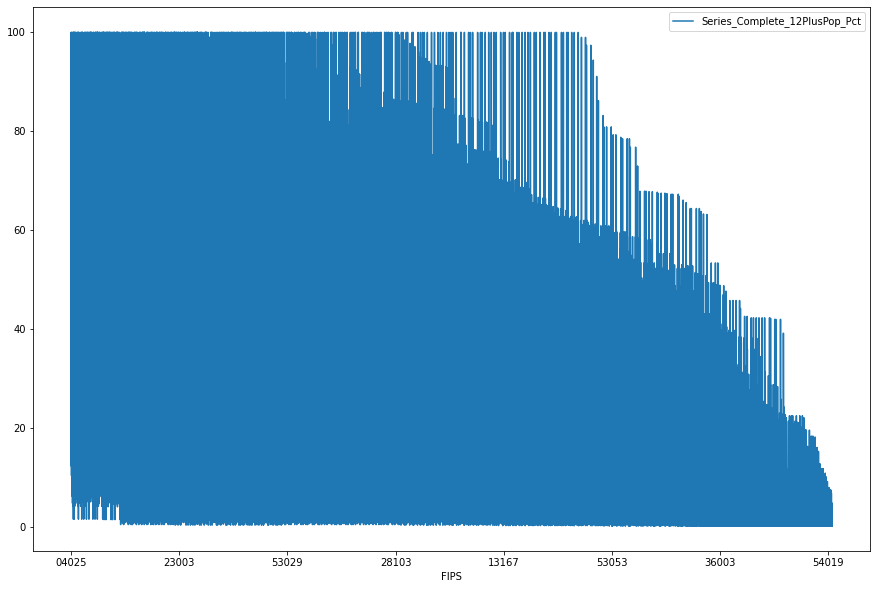

In [50]:
plt.rcParams['figure.figsize'] = (15, 10)
data.plot.line(y= 'Series_Complete_12PlusPop_Pct', x = 'FIPS' )

From the graph we can observe that states with a lower FIPS have a higher percentage of vaccinated people.

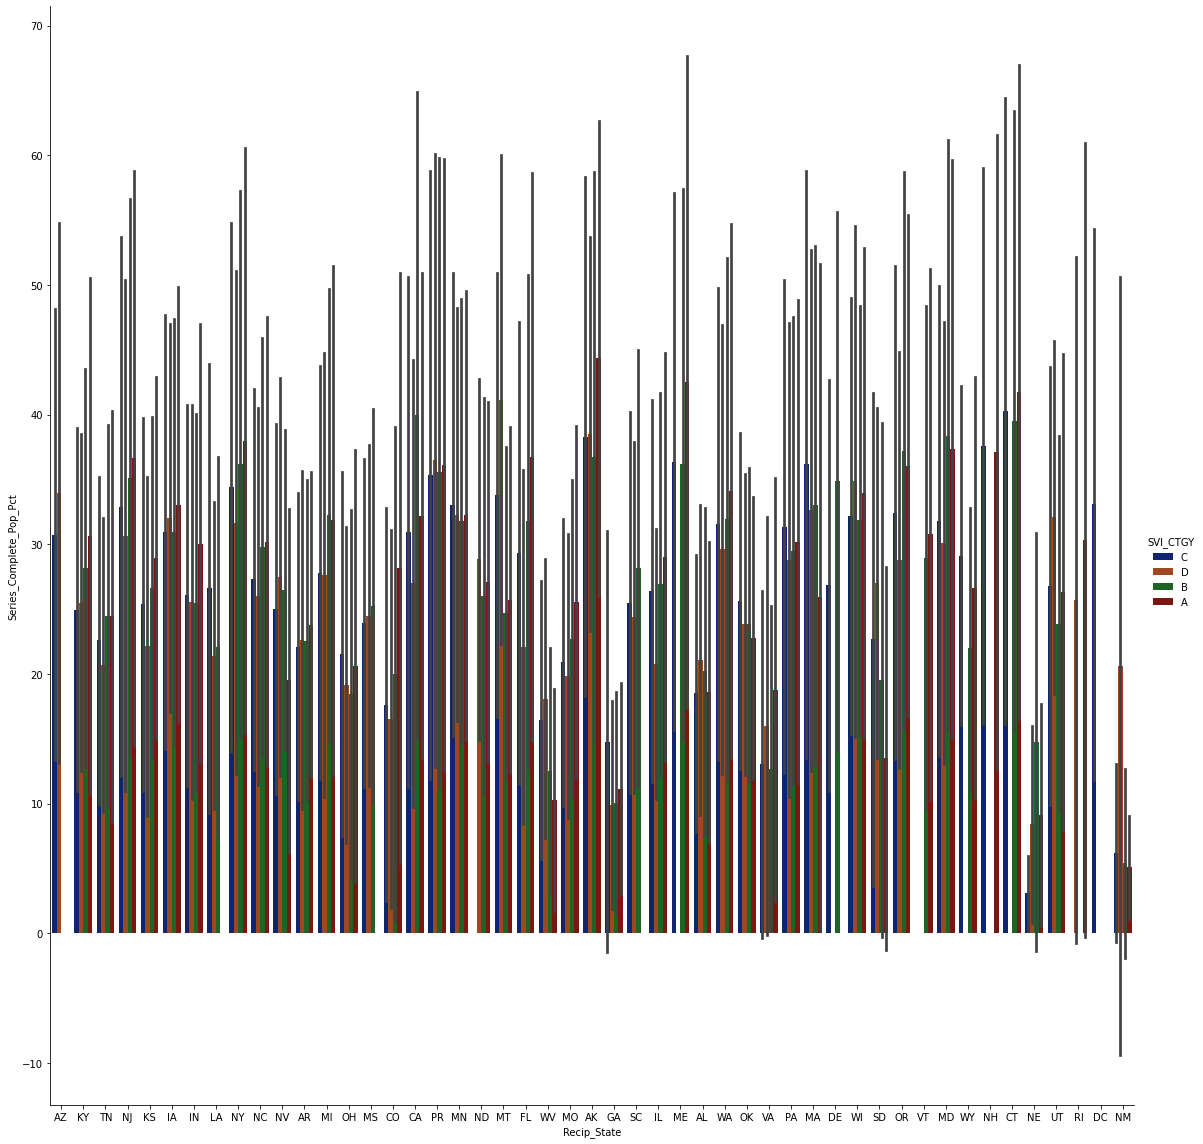

In [51]:
plt.rcParams['figure.figsize'] = (10, 7)
g = sns.catplot(
    data=data, kind="bar",
    x="Recip_State", y="Series_Complete_Pop_Pct", hue="SVI_CTGY",
    ci="sd", palette="dark", height=16
)

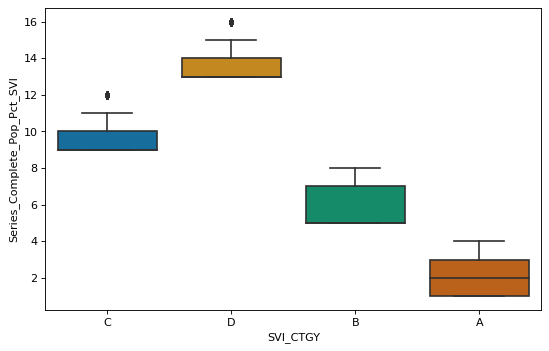

In [41]:
figure(figsize=(8, 5), dpi=80)
sns.boxplot(y='Series_Complete_Pop_Pct_SVI', x='SVI_CTGY', 
                 data=data, 
                 palette="colorblind"
)

It can be oserved that the regions marked with SVI - D have a higher vaccination rate, followed by C, B and A. This implies that population in region A is at a higher risk of suffering from Covid-19

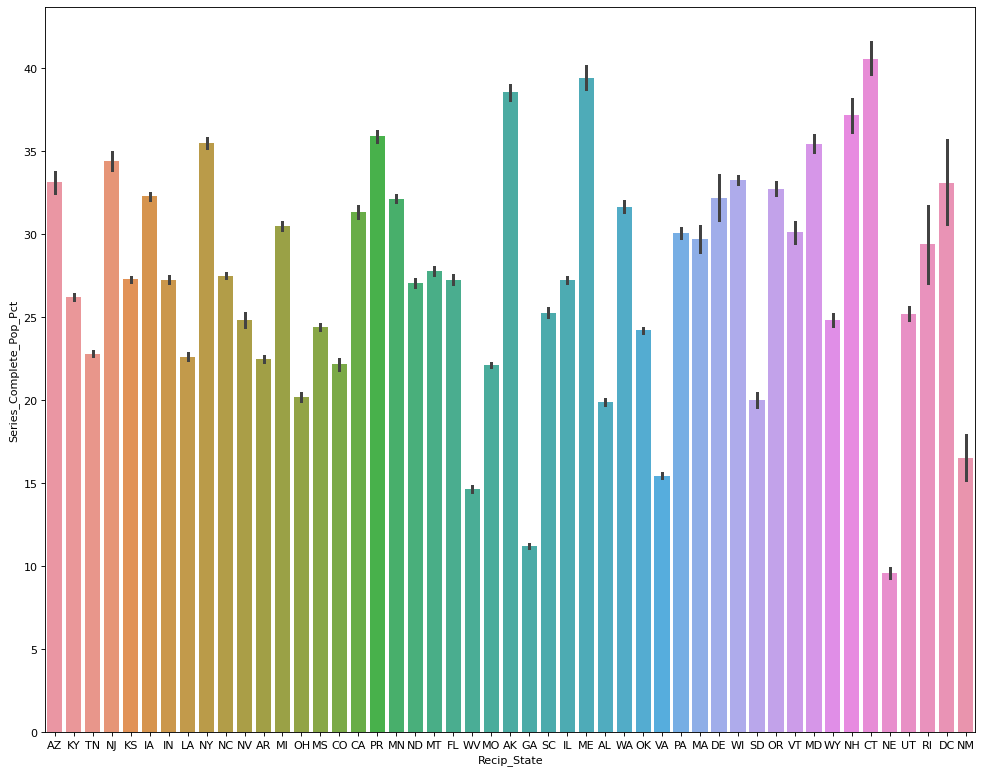

In [52]:
figure(figsize=(15, 12), dpi=80)
sns.barplot(x='Recip_State', y='Series_Complete_Pop_Pct', data = data)

It can be observed that Connecticut (CT) has the highest number of fully vaccinated people, followed by Maine and Alaska. 
Since the states are in different regions (North, South, East, West) of the country, we can conclude that the procedure is not area specific

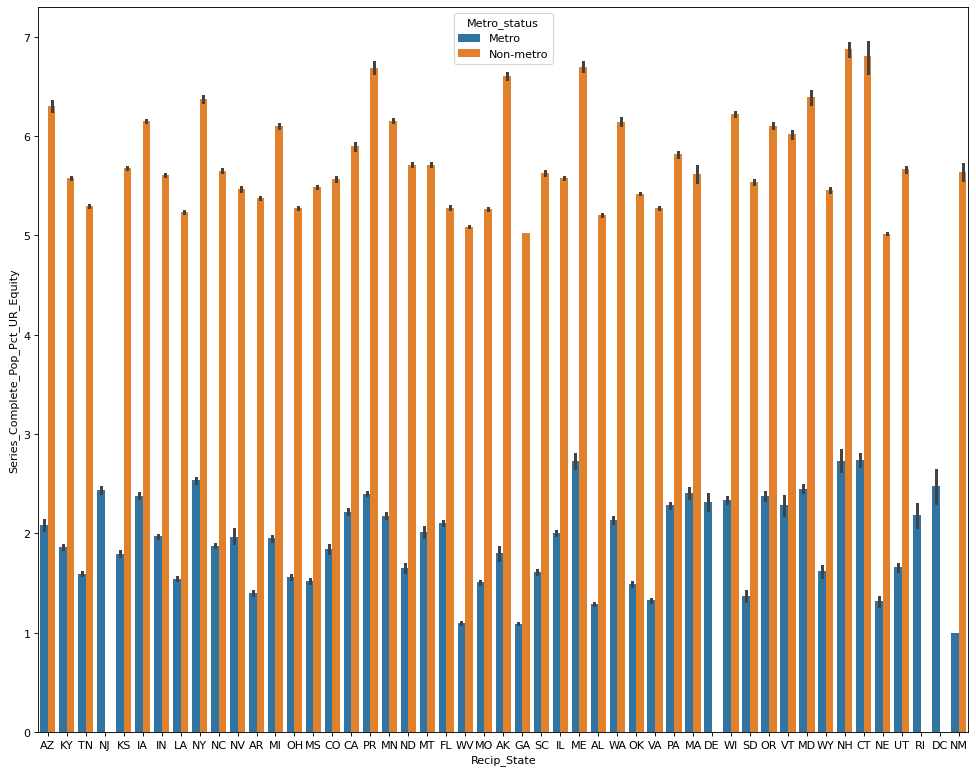

In [54]:
figure(figsize=(15, 12), dpi=80)
sns.barplot(x="Recip_State", y="Series_Complete_Pop_Pct_UR_Equity", hue="Metro_status", data=data)

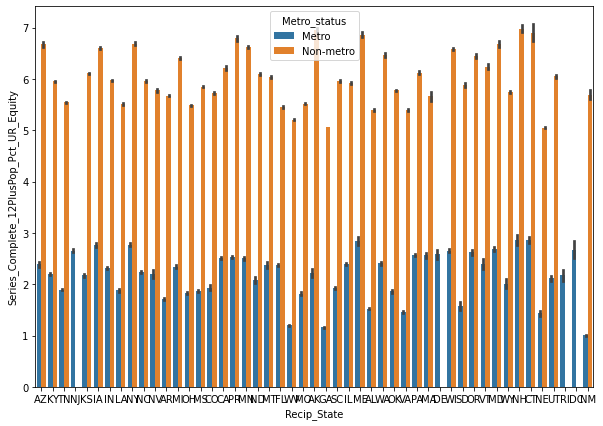

In [85]:
sns.barplot(x="Recip_State", y="Series_Complete_12PlusPop_Pct_UR_Equity", hue="Metro_status", data=data)

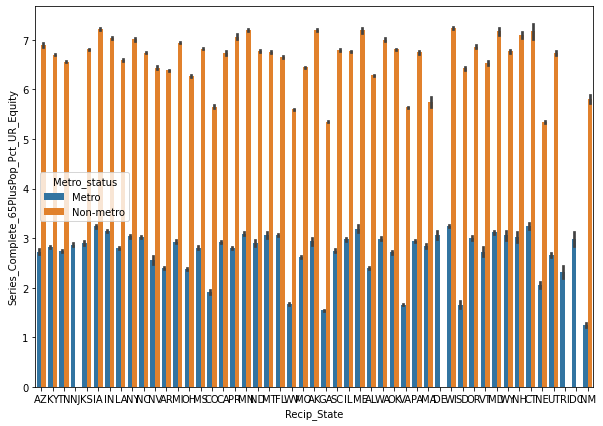

In [86]:
sns.barplot(x="Recip_State", y="Series_Complete_65PlusPop_Pct_UR_Equity", hue="Metro_status", data=data)

It can be observed that for all the states, higher percentage of people (regardless of their age) living in non-metro cities are fully vaccinated.

In [65]:
df1 = data[data['Series_Complete_Pop_Pct'] == 99.900000]

In [71]:
df1[['Recip_State','Recip_County']]

,Recip_State,Recip_County
285,GA,Chattahoochee County
1299,PR,Arecibo Municipio
2559,NM,McKinley County
3410,GA,Chattahoochee County
4795,PR,Arecibo Municipio
...,...,...
547324,GA,Chattahoochee County
548676,GA,Chattahoochee County
553013,GA,Chattahoochee County
555499,GA,Chattahoochee County


In [70]:
df1[['Recip_State']].nunique()

Recip_State    3
dtype: int64

There are only 3 states with almost (99.9%) fully vaccinated people in certain counties - Georiga, Puerto Rico and New Mexico

Text(0, 0.5, 'Count')

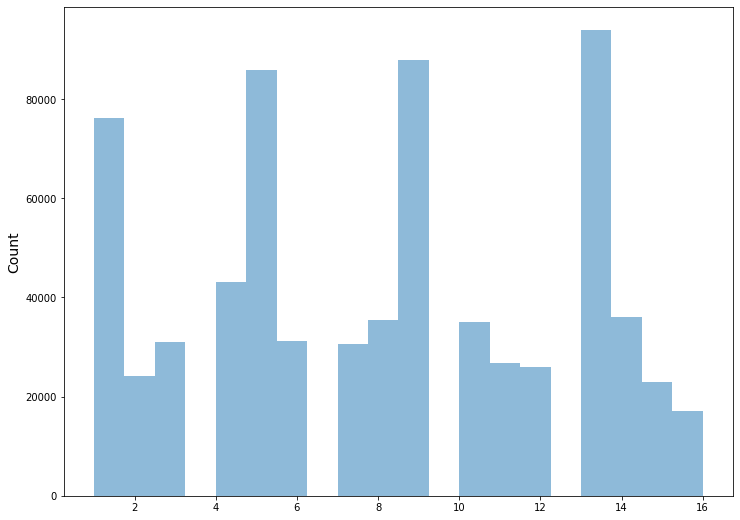

In [84]:
plt.figure(figsize=(12,9))
plt.hist(data['Series_Complete_12PlusPop_Pct_SVI'], bins=20, alpha=0.5, label="12+")
#plt.hist(data['Series_Complete_18PlusPop_Pct_SVI'], bins=20, alpha=0.5, label="18+")
#plt.hist(data['Series_Complete_65PlusPop_Pct_SVI'], bins=20, alpha=0.5, label="65+")
#plt.legend(loc='upper right')
plt.ylabel("Count", size=14)